In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('Salary_Data.csv')
data.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [3]:
print(data.shape)
data.describe().T
data.dropna(inplace=True)

(6704, 6)


In [4]:
#filter out categorical and numerical attributes
col = data.columns
cat_col = [val for val in col if data[val].dtype=='O']
num_col = [val for val in col if data[val].dtype!='O']
print(f"{len(cat_col)} columns in as categorical namely ",cat_col)
print(f"{len(num_col)} columns in as numerical namely ",num_col)

3 columns in as categorical namely  ['Gender', 'Education Level', 'Job Title']
3 columns in as numerical namely  ['Age', 'Years of Experience', 'Salary']


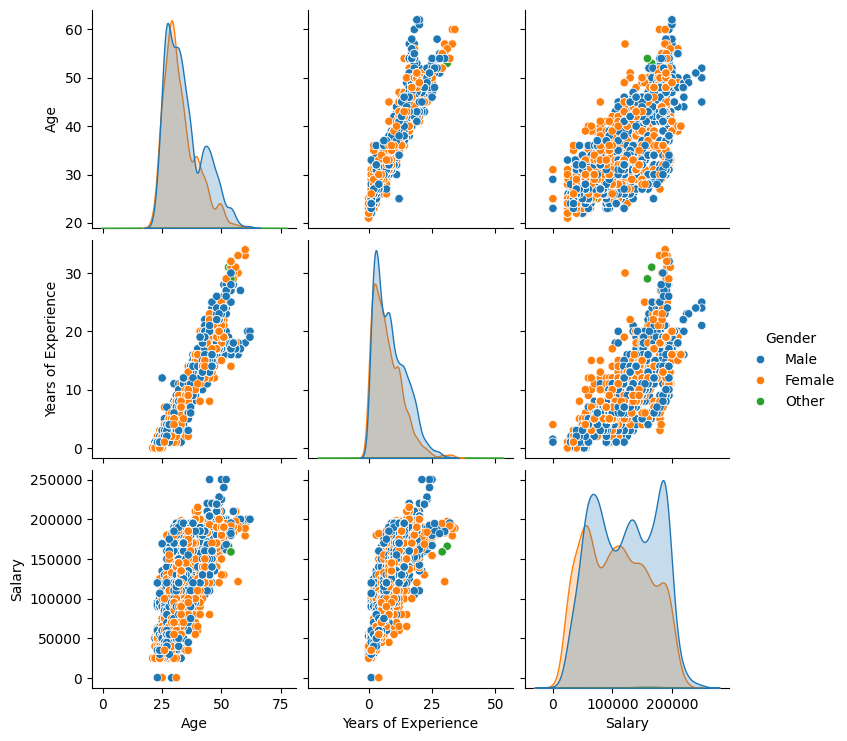

In [5]:
sns.pairplot(data,hue='Gender')

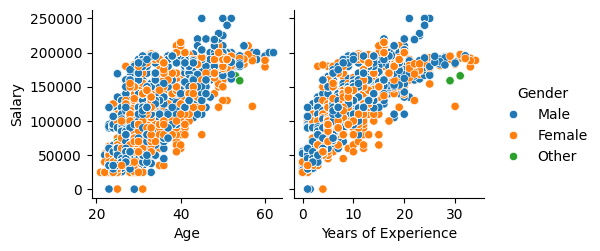

In [6]:
sns.pairplot(data,x_vars=['Age','Years of Experience'],y_vars=['Salary'],hue='Gender')

In [7]:
df = data[['Age','Years of Experience','Salary']]
df.corr()


,Age,Years of Experience,Salary
Age,1.000000,0.937725,0.728061
Years of Experience,0.937725,1.000000,0.808968
Salary,0.728061,0.808968,1.000000


<Axes: >

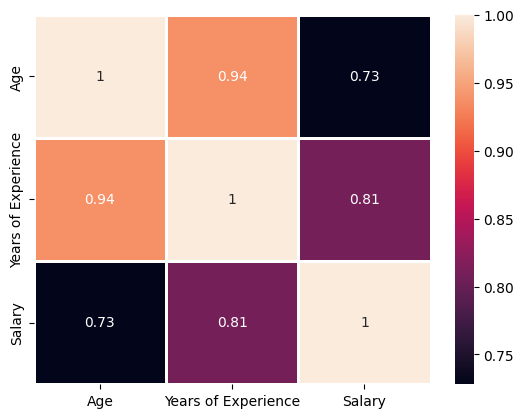

In [8]:
sns.heatmap(df.corr(),annot=True,lw=1)

<Axes: ylabel='Age'>

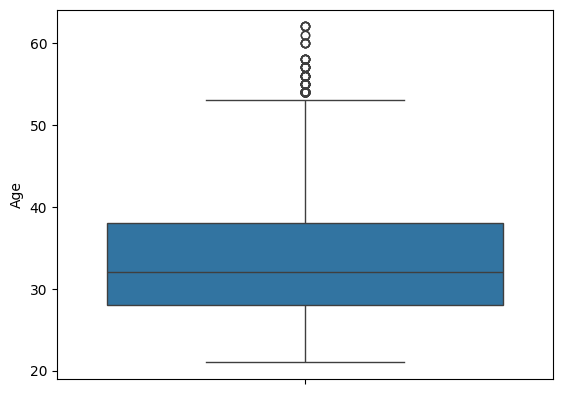

In [9]:
sns.boxplot(data['Age'])

<Axes: ylabel='Salary'>

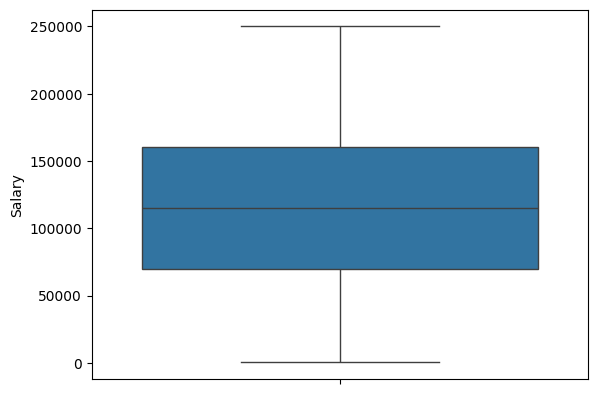

In [10]:
sns.boxplot(data['Salary'])

In [18]:
#data preparation

df = data.drop_duplicates(keep='first')
X = df[['Age','Years of Experience']]
Y = df['Salary']

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2, random_state=42)

print("Training data size: ",X_train.shape," and ",Y_train.shape)
print("Testing data size: ",X_test.shape," and ",Y_test.shape)

Training data size:  (1429, 2)  and  (1429,)
Testing data size:  (358, 2)  and  (358,)


In [19]:
#construct a bias matrix
w = np.random.random(X_train.shape[1]+1)
w.shape


(3,)

In [20]:
def predict(X,b):
    y = np.dot(X,b)
    return y

def calculate_mse(predict,actual):
    sum_error = 0.0
    length = predict.shape[0]
    try:
        for i in range(length):
            error = predict[i] - actual[i]
            sum_error += error**2
    except:
        pass
    
    mse = sum_error/float(length)
    return mse

def add_bias(mat):
    # mat = mat.toarray()
    b = np.ones((mat.shape[0], 1))
    x = np.concatenate((b,mat), axis=1)
    return x

def calculate_weights(X,Y):
    #calculate weights w = (x'x)^-1 . x'y
    first = np.dot(X.T,X)
    first = np.linalg.inv(first)
    second = np.dot(X.T,Y)
    w = np.dot(first,second)
    return w



In [21]:
X_train = add_bias(X_train)
X_train = X_train.astype(float)
X_train.shape

(1429, 3)

In [25]:
wt = w
mse = list()
for i in range(100):
    wt = calculate_weights(X_train,Y_train)
    y_pred = predict(X_train,wt)
    error = calculate_mse(y_pred,Y_train)
    mse.append(error)
    print("MSE: ",error)

MSE:  73892710.35055575
MSE:  73892710.35055575
MSE:  73892710.35055575
MSE:  73892710.35055575
MSE:  73892710.35055575
MSE:  73892710.35055575
MSE:  73892710.35055575
MSE:  73892710.35055575
MSE:  73892710.35055575
MSE:  73892710.35055575
MSE:  73892710.35055575
MSE:  73892710.35055575
MSE:  73892710.35055575
MSE:  73892710.35055575
MSE:  73892710.35055575
MSE:  73892710.35055575
MSE:  73892710.35055575
MSE:  73892710.35055575
MSE:  73892710.35055575
MSE:  73892710.35055575
MSE:  73892710.35055575
MSE:  73892710.35055575
MSE:  73892710.35055575
MSE:  73892710.35055575
MSE:  73892710.35055575
MSE:  73892710.35055575
MSE:  73892710.35055575
MSE:  73892710.35055575
MSE:  73892710.35055575
MSE:  73892710.35055575
MSE:  73892710.35055575
MSE:  73892710.35055575
MSE:  73892710.35055575
MSE:  73892710.35055575
MSE:  73892710.35055575
MSE:  73892710.35055575
MSE:  73892710.35055575
MSE:  73892710.35055575
MSE:  73892710.35055575
MSE:  73892710.35055575
MSE:  73892710.35055575
MSE:  73892710.3

<Axes: >

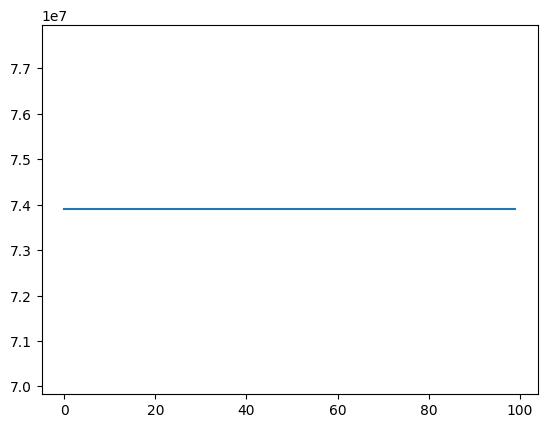

In [26]:
sns.lineplot(mse)